In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pm4py==2.1.2
!apt install -y graphviz
!pip install graphviz

Traceback (most recent call last):
  File "<frozen importlib._bootstrap_external>", line 87, in _path_is_mode_type


During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.parser import ConfigOptionParser
  File "/usr/local/lib/python3.7/dist-packages/p

Reading CSV file

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Process mining course/heart_log_val_0.csv')

In [ ]:
df.head()

In [ ]:
event_type = df['type'].unique()
print(event_type)

['lab' 'admission' 'artificial' 'elix_comorb']


In [ ]:
event = df['concept:name'].unique()

In [ ]:
for i in event:
    print(i)

Sodium_mean_2
Sodium_std_0
unplanned
Medicare
Urea Nitrogen_mean_2
Sodium_std_2
Urea Nitrogen_std_2
event_0
event_2
event_3
event_6
event_9
event_11
event_14
event_15
event_16
event_19
event_20
event_26
event_29
CHF
OND
COAG
FED
Urea Nitrogen_mean_1
Urea Nitrogen_std_1
Private
Sodium_mean_3
Urea Nitrogen_mean_3
CARIT
VALV
PARA
Urea Nitrogen_std_4
Medicaid
PCD
HYPUNC
CPD
HYPOTHY
Sodium_std_1
NTproBNP_mean_9
NTproBNP_std_1
Sodium_std_3
Urea Nitrogen_std_3
Sodium_mean_1
DIABUNC
LD
WLOSS
ALCOHOL
PVD
NTproBNP_std_0
HYPC
RF
DEPRE
planned
Creatinine, Serum_mean_0
Creatinine, Serum_std_0
DRUG
BLANE
SOLIDTUM
NTproBNP_std_6
OBES
DIABC
Urea Nitrogen_mean_0
PUD
METACANC
DANE
Sodium_mean_4
Sodium_std_4
LYMPH
Urea Nitrogen_mean_4
Urea Nitrogen_std_0
PSYCHO
RHEUMD


 Converting csv file to xes file

In [ ]:
from pm4py.objects.log.exporter.xes import exporter as xes_exporter

In [ ]:
xes_exporter.apply(df, '/content/drive/My Drive/Process mining course/test.xes')

Inductive miner

In [ ]:
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

In [ ]:
log = xes_importer.apply('/content/drive/My Drive/Process mining course/test.xes')
for thrd in ["0.8"]:
    net, initial_marking, final_marking = inductive_miner.apply(log, parameters={"NOISE_THRESHOLD": float(thrd)})
### Report Petri-net properties ###
print(float(thrd))
print("PN Places:", len(net.places))
print("PN Transitions:", len(net.transitions))

Exporting PNML

In [ ]:
from pm4py.objects.petri.exporter import exporter as pnml_exporter
pnml_exporter.apply(net, initial_marking, "/content/drive/My Drive/Process mining course/test.pnml", final_marking=final_marking)

In [ ]:
from pm4py.objects.petri.importer import importer as pnml_importer
net, im, fm = pnml_importer.apply("/content/drive/My Drive/Process mining course/test.pnml")

In [ ]:
print("PN Places:", len(net.places))
print("\nPN Places:", list(net.places))
print("\nPN Transitions:", len(net.transitions))
print("\nPN Transitions:", list(net.transitions))

PN Places: 93

PN Places: [p_46, source, p_17, p_25, p_104, p_98, p_47, p_13, p_37, p_64, p_54, p_12, p_77, p_69, p_27, p_82, p_85, p_22, p_34, p_94, p_103, p_65, p_86, p_91, p_39, p_84, p_59, p_68, p_55, p_40, p_95, sink, p_83, p_101, p_33, p_99, p_80, p_97, p_107, p_96, p_67, p_44, p_92, p_78, p_70, p_81, p_45, p_41, p_53, p_87, p_31, p_75, p_6, p_88, p_49, p_5, p_62, p_35, p_16, p_32, p_90, p_15, p_10, p_60, p_93, p_63, p_51, p_7, p_23, p_26, p_30, p_73, p_8, p_106, p_109, p_72, p_58, p_50, p_18, p_52, p_105, p_74, p_42, p_76, p_89, p_100, p_11, p_110, p_111, p_57, p_36, p_79, p_24]

PN Transitions: 148

PN Transitions: [Sodium_mean_4, CHF, Urea Nitrogen_std_1, SOLIDTUM, PSYCHO, skip_50, Medicare, tauJoin_52, init_loop_11, NTproBNP_std_1, tauJoin_32, skip_87, skip_59, skip_60, tauJoin_38, skip_81, skip_47, skip_63, skip_66, tau_1, WLOSS, skip_18, PCD, DIABUNC, event_14, skip_72, HYPOTHY, unplanned, Sodium_std_3, skip_73, skip_19, tauSplit_31, CPD, skip_75, METACANC, planned, event_3

Petri Net

In [ ]:
from pm4py.visualization.petrinet import visualizer as pn_visualizer
import graphviz

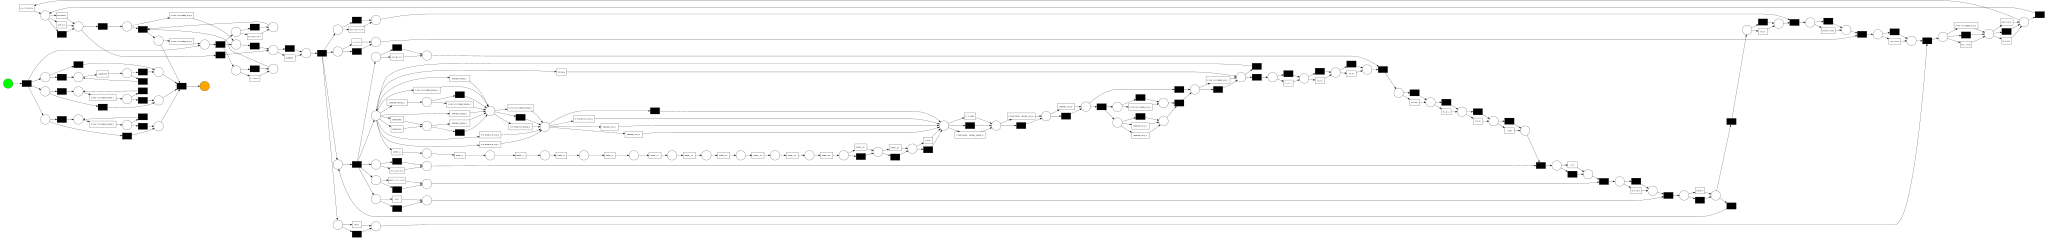

In [ ]:
gviz = pn_visualizer.apply(net, im, fm)
#pn_visualizer.view(gviz)
graphviz.Source(gviz)

In [ ]:
#conformance checking

Conformance checking

Precision

In [ ]:
from pm4py.evaluation.precision import evaluator as precision_evaluator
prec = precision_evaluator.apply(log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)

In [ ]:
print(prec)

0.03927961362040111


Fitness

In [ ]:
# Token based
from pm4py.evaluation.replay_fitness import evaluator as replay_fitness_evaluator
fitness_token = replay_fitness_evaluator.apply(log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)

# Alignment based
#fitness_alignment = replay_fitness_evaluator.apply(log, net, im, fm, variant=replay_fitness_evaluator.Variants.ALIGNMENT_BASED)

In [ ]:
print(fitness_token)
#print(fitness_alignment)

{'perc_fit_traces': 20.512820512820515, 'average_trace_fitness': 0.9829050159621386, 'log_fitness': 0.984326802799035}
